# Keras 창시자에게 배우는 딥러닝 

### update 2020.03.11 
## 케라스 교재소스 수정 및 추가 - 하성호

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [4]:
#배열의 구조
train_images.shape

(60000, 28, 28)

In [5]:
#차원수
train_images.ndim

3

In [7]:
#데이터타입
train_images.dtype

dtype('uint8')

In [6]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
#test할 라벨의 정답을 보자!
#test를 train으로 또는 train을 test로
train_labels[0]

5

In [6]:
#test할 이미지를 배열로 확인하자
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

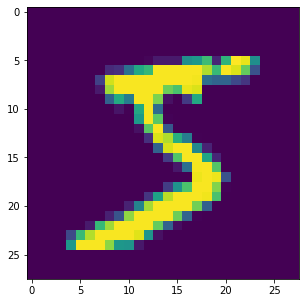

In [9]:
#그림으로 출력하기 위해 matplotlib를 이용하자.
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = (10, 10) # set figure size
plt.figure(figsize=(5,5)) #figsize를 이용하여 출력할 그림의 크기를 조절할 수 있다.

plt.imshow(train_images[0])
plt.show()

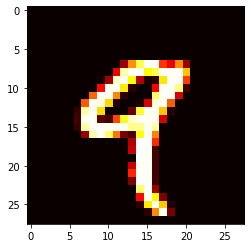

In [19]:
#또다른 방법
digit = train_images[4]

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.get_cmap('binary'))
plt.show()

### 코드2-2 신경망 구조

In [8]:
from keras import models
from keras import layers

In [9]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

### 코드 2-3 컴파일 단계

In [10]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

### 코드 2-4 이미지 데이터 준비하기

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### 코드 2-5 레이블 준비하기

In [12]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 학습시키기

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.2533 - accuracy: 0.9280
Epoch 2/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.1027 - accuracy: 0.9692
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0670 - accuracy: 0.9797
Epoch 4/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0485 - accuracy: 0.9858
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0372 - accuracy: 0.9890


### 정확도 학인하기

In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 51us/step


In [19]:
print('손실률:', test_loss)

손실률: 0.0632407333301846


In [18]:
print('정확도: ', test_acc)

정확도:  0.98089998960495
